<a href="https://colab.research.google.com/github/sharon-nasimiyu/Automation-and-Prediction-of-data/blob/main/women_in_data_april15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT: After credit card campaign a hypothesis was carried out to identify if the conpany improved credit card usage or not.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

In [ ]:
#loading the dataset
customer_data = pd.read_csv('/content/bank_data.csv')
customer_data.head(2)

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
0,70,Male,4.0,1,Single,1,57.0,52,57.2,49.2
1,121,Female,4.0,2,Single,3,68.0,59,64.9,63.6


In [ ]:
customer_data.size

2020

In [ ]:
customer_data.custid.nunique()

200

In [ ]:
customer_data.custid.isnull

<bound method Series.isnull of 0       70
1      121
2       86
3      141
4      172
      ... 
197     31
198    145
199    187
200    118
201    137
Name: custid, Length: 202, dtype: int64>

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   custid                       202 non-null    int64  
 1   sex                          201 non-null    object 
 2   channel                      201 non-null    float64
 3   region                       202 non-null    int64  
 4   marital_status               201 non-null    object 
 5   segment                      202 non-null    int64  
 6   usage_before_campaign        201 non-null    float64
 7   usage_after_campaign_month1  202 non-null    int64  
 8   usage_after_campaign_month2  201 non-null    float64
 9   latest_month_usage           201 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 15.9+ KB


In [ ]:
customer_data.describe()

,custid,channel,region,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
count,202.000000,201.000000,202.000000,202.000000,201.000000,202.000000,201.000000,201.000000
mean,100.064356,3.427861,2.049505,2.029703,52.258706,52.762376,58.138308,63.122388
std,57.785336,1.037314,0.724500,0.690453,10.248060,9.448102,10.578798,11.210903
min,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,34.100000,39.600000
25%,50.250000,3.000000,2.000000,2.000000,44.000000,46.000000,50.600000,54.000000
50%,99.500000,4.000000,2.000000,2.000000,50.000000,54.000000,59.400000,62.400000
75%,149.750000,4.000000,3.000000,2.750000,60.000000,60.000000,66.000000,70.800000
max,200.000000,4.000000,3.000000,3.000000,76.000000,67.000000,85.200000,90.000000


DATA CLEANING

In [ ]:
#Checking duplicated rows
customer_data.duplicated().sum()

2

In [ ]:
#showing duplicated rows
customer_data[customer_data.duplicated(keep= False)]

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
10,75,Male,4.0,2,Single,3,60.0,46,50.6,61.2
14,38,Male,3.0,1,Single,2,45.0,57,62.7,60.0
19,75,Male,4.0,2,Single,3,60.0,46,50.6,61.2
23,38,Male,3.0,1,Single,2,45.0,57,62.7,60.0


In [ ]:
#Drop duplicates
customer_data.drop_duplicates()

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
0,70,Male,4.0,1,Single,1,57.0,52,57.2,49.2
1,121,Female,4.0,2,Single,3,68.0,59,64.9,63.6
2,86,Male,4.0,3,Single,1,44.0,33,36.3,64.8
3,141,Male,4.0,3,Single,3,63.0,44,48.4,56.4
4,172,NaN,NaN,2,NaN,2,NaN,52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
197,31,Female,2.0,2,Married,1,55.0,59,64.9,62.4
198,145,Female,4.0,2,Single,3,42.0,46,50.6,45.6
199,187,Female,4.0,2,Married,1,57.0,41,45.1,68.4
200,118,Female,4.0,2,Single,1,55.0,62,68.2,69.6


In [ ]:
customer_data.size

2020

In [ ]:
#checking for null per column
customer_data.isna().sum()

custid                         0
sex                            1
channel                        1
region                         0
marital_status                 1
segment                        0
usage_before_campaign          1
usage_after_campaign_month1    0
usage_after_campaign_month2    1
latest_month_usage             1
dtype: int64

In [ ]:
#see rows with nulls
customer_data[customer_data.isnull().any(axis =1)]

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
4,172,NaN,NaN,2,NaN,2,NaN,52,NaN,NaN


In [ ]:
#in this case drop the nan values since its just one customer
#however we can forward the data to marketting team so as they can check why the customer is not transacting
#This might reduced the dormancy levels the bank is experiencing also

In [ ]:
#checking outliers
customer_data.columns

Index(['custid', 'sex', 'channel', 'region', 'marital_status', 'segment',
       'usage_before_campaign', 'usage_after_campaign_month1',
       'usage_after_campaign_month2', 'latest_month_usage'],
      dtype='object')

<Axes: >

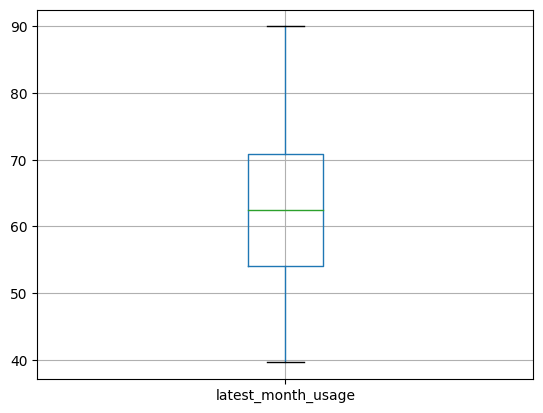

In [ ]:
customer_data.boxplot(column = ['latest_month_usage'])

In [ ]:
#Encoding - check with her this cell for allignment
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
#marital status
married = pd.get_dummies(customer_data['marital_status'], drop_first = True)
married.tail()


,Single
197,0
198,1
199,0
200,1
201,0


In [ ]:
#replace the newly created column with one we have encoded
customer_data['marital_status'] = married
customer_data.head()

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
0,70,Male,4.0,1,1,1,57.0,52,57.2,49.2
1,121,Female,4.0,2,1,3,68.0,59,64.9,63.6
2,86,Male,4.0,3,1,1,44.0,33,36.3,64.8
3,141,Male,4.0,3,1,3,63.0,44,48.4,56.4
4,172,NaN,NaN,2,0,2,NaN,52,NaN,NaN


**HYPOTHESIS**

*NULL *- There was  no change in credit card usage after the campaign
*ALTERNATIVE* - There was change in credit card usage after the campaign

In [ ]:
import  scipy.stats as stats

stats.ttest_rel(a = customer_data.usage_before_campaign, b = customer_data.usage_after_campaig)